# **LABORATORY 8**

# **Pancake Networks**

In [16]:
import pydot
from collections import defaultdict 
from IPython.display import Image, display
import math as math
import itertools

def lstr(p):
        return ''.join([str(elem)  for elem in p])

def color_nod(s):
    color_v = ["green","red","blue","white","lightgray"]
    if s[::-1][0] == 1:
      n=0
    elif s[::-1][0] == 2:
      n=1
    elif s[::-1][0] == 3:
      n=2
    elif s[::-1][0] == 4:
      n=3
    else:
      n=4
    return(color_v[n])

def  n3(s,queue,G,n):
  for i in range(6):
    i = i%((len(s)-2))
    queue.append(s)
    color_node = color_nod(s)
    node = pydot.Node(lstr(s),style="filled", fillcolor=color_node)
    G.add_node(node)
    s1 = list(s)
    s = s[i+1::-1] + s[i+2:]
    s2 = s[i+1::-1] + s[i+2:]    
    node = pydot.Node(lstr(s))
    node1 = pydot.Node(lstr(s1))
    edge = pydot.Edge(node,node1)
    G.add_edge(edge)
  return(G,queue)

def fnodes(s): 
        color_v = ["green","red","blue","white"]
        queue = [] 
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="graph")
        visited[lstr(s)] = True
        graph[lstr(s)]=[]
        node = pydot.Node(lstr(s))
        G.add_node(node)
        T = list(s)
        for i in range(6):
          i = i%2
          queue.append(s)
          color_node = color_nod(s)
          node = pydot.Node(lstr(s),style="filled", fillcolor=color_node)
          G.add_node(node)               
          s1 = list(s)
          s = s[i+1::-1] + s[i+2:]
          node = pydot.Node(lstr(s))
          node1 = pydot.Node(lstr(s1))
          edge = pydot.Edge(node,node1)
          G.add_edge(edge)

        for i in range(len(queue)*10):
          k = queue[i][::-1]
          n3(k,queue,G,i+1)
        
        while queue != []:
          i=0
          if queue[i][::-1] in queue:
            queue.remove(queue[i][::-1])
          G.add_edge(pydot.Edge(pydot.Node(lstr(queue[i])),pydot.Node(lstr(queue[i][::-1]))))
          queue.remove(queue[i])
        return(G)

def graph_f(s):
  G = fnodes(s)
  G.set_simplify(G)
  im = Image(G.create_png())
  display(im)
  


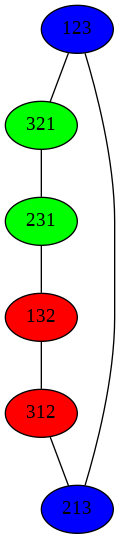

In [14]:
graph_f([1,2,3])

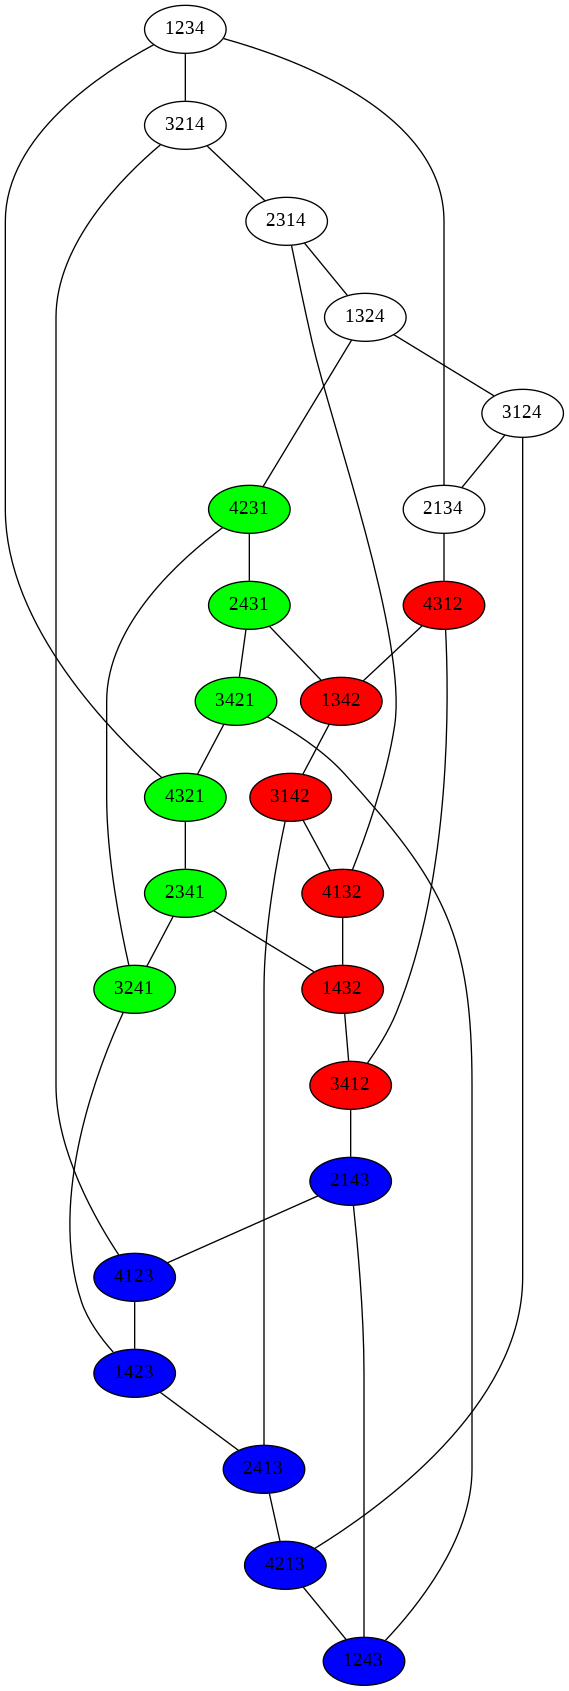

In [105]:
  graph_f([1,2,3,4])

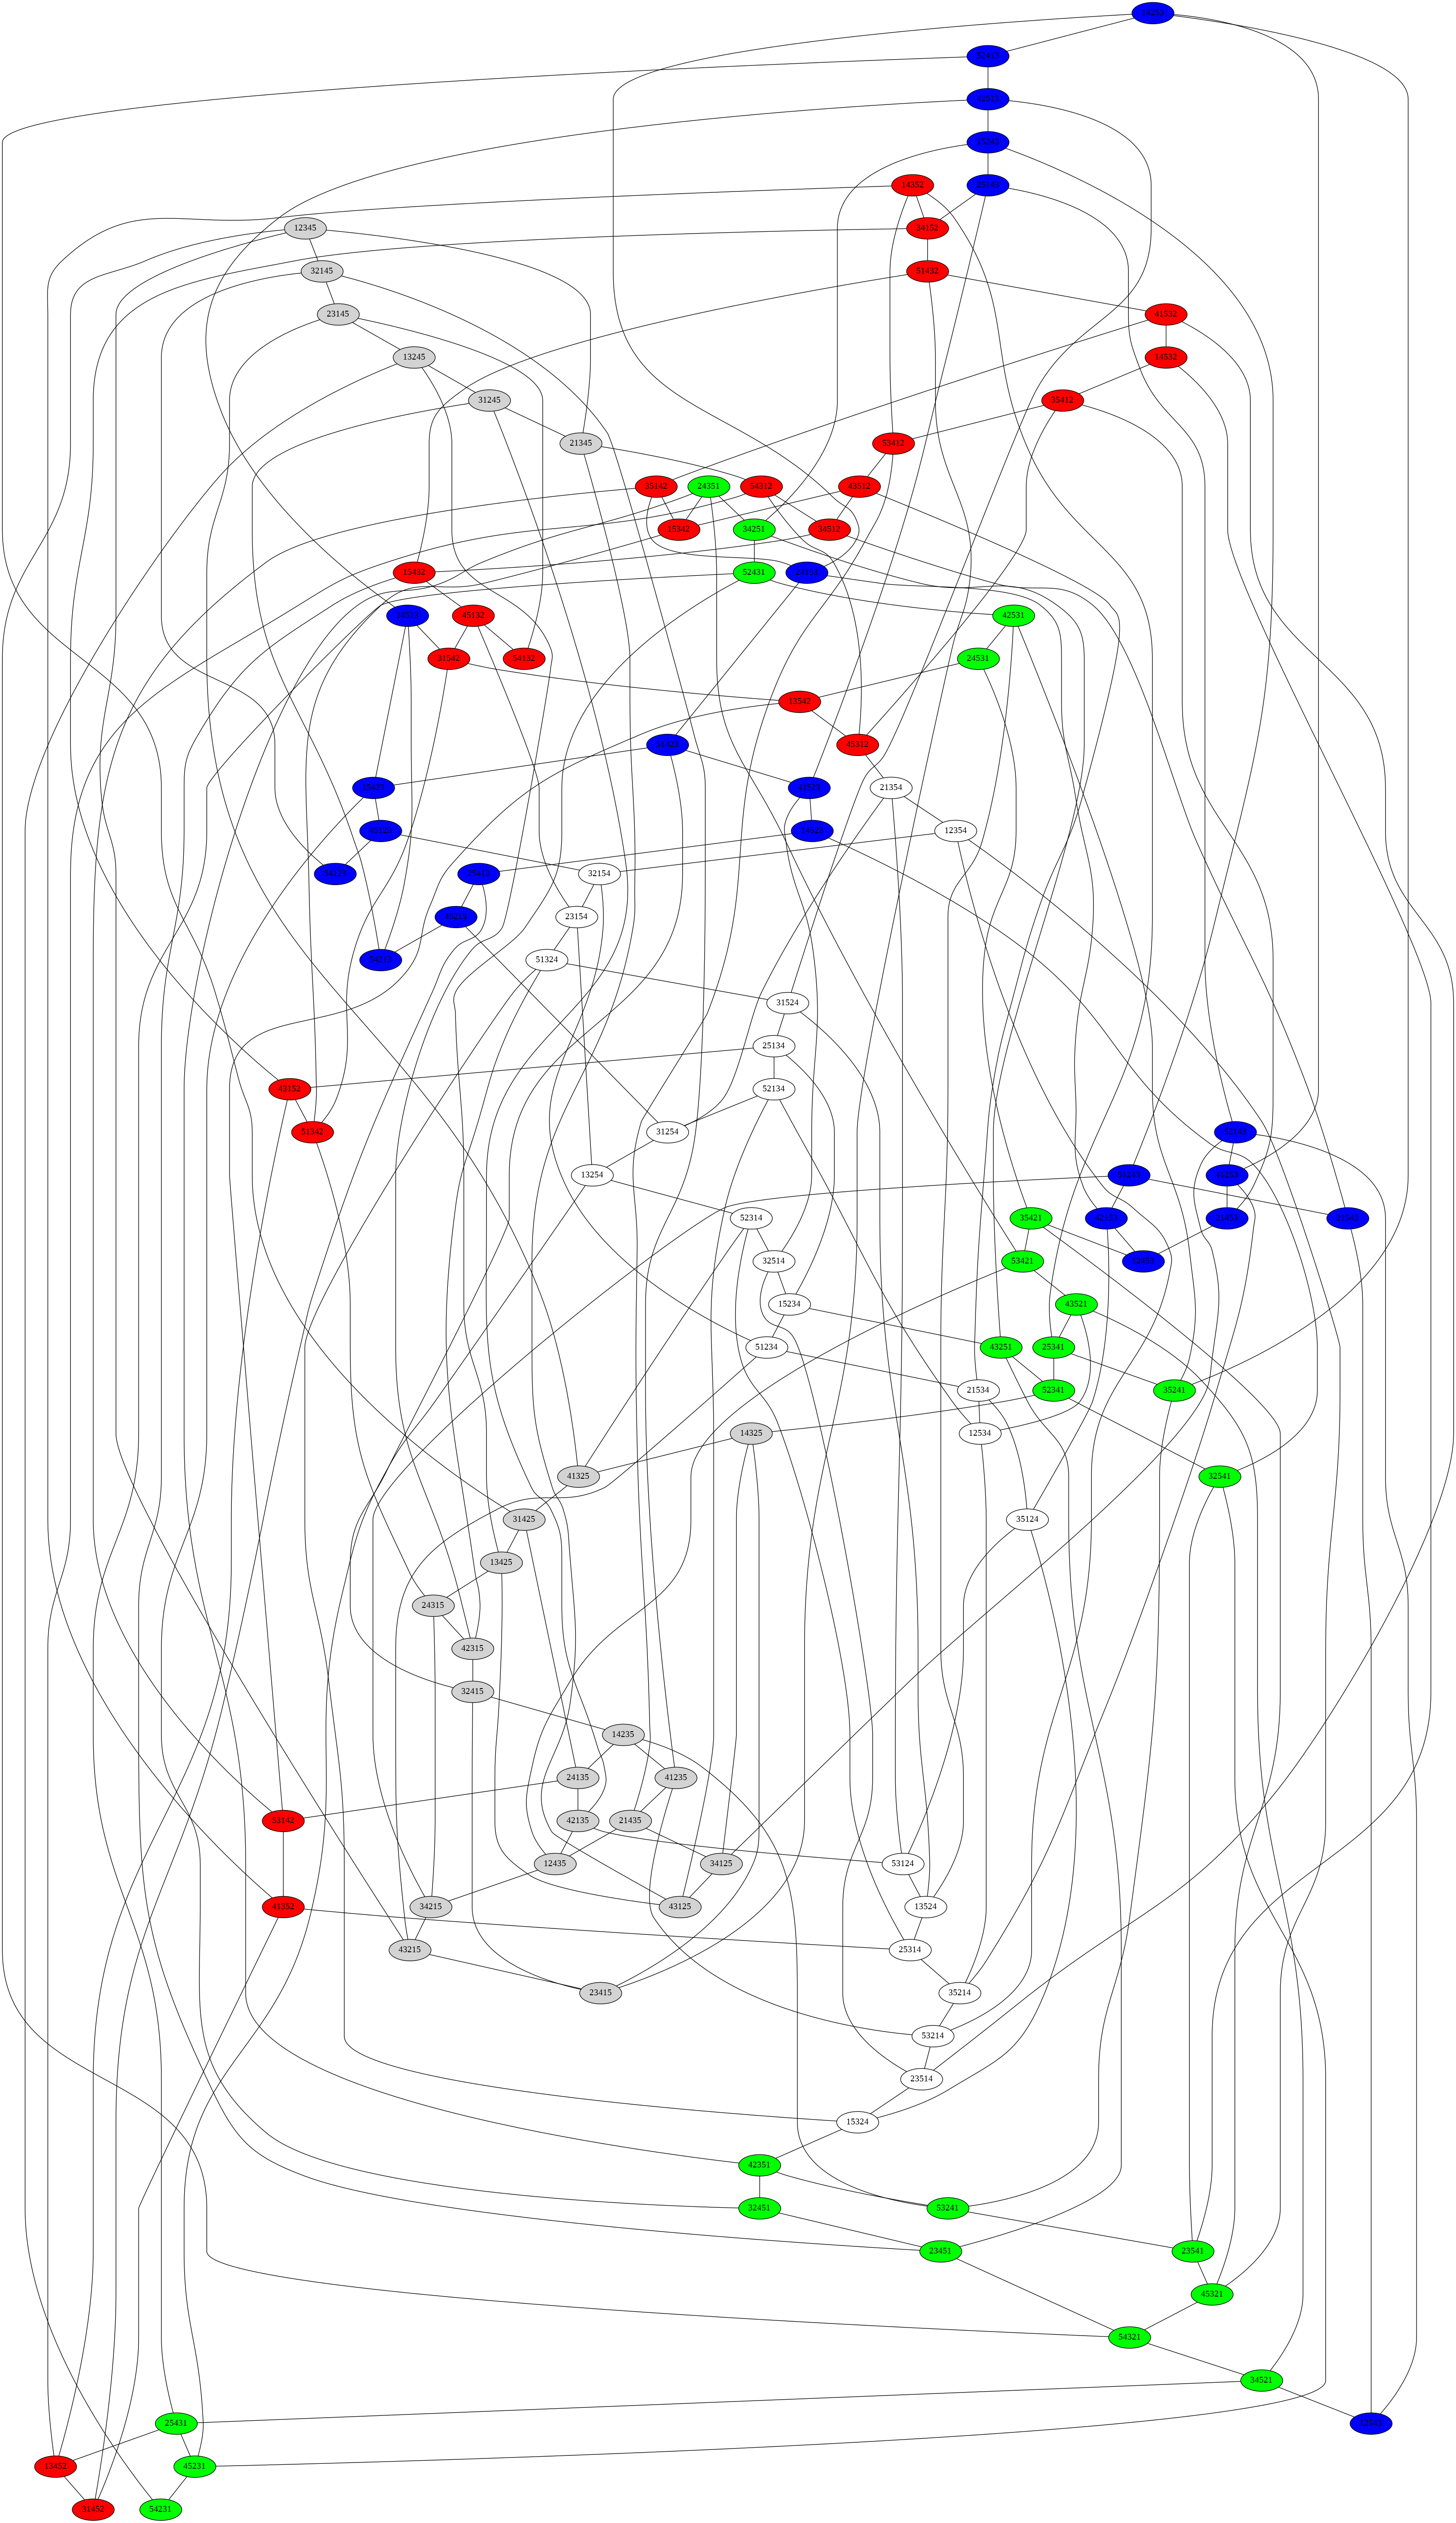

In [106]:
graph_f([1,2,3,4,5])

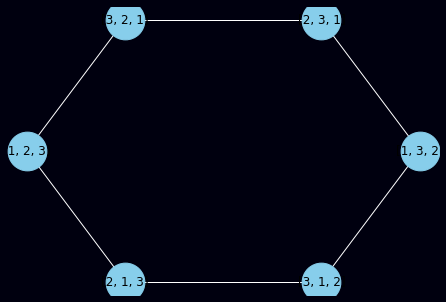

In [12]:
# libraries
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from collections import defaultdict 
from IPython.display import Image, display

G = nx.Graph()
def fnodes():
  queue = []
  l = [[1,2,3]]
  j=0
  for j in range(len(l)):
    node = l[j]
    for i in range(6):
      queue.append(node)
      i = i%2
      G.add_node(str(node))
      node1 = list(node)
      node = node[i+1::-1] + node[i+2:]
      G.add_edge(str(node),str(node1))
      #G.add_edge(str(node),str(node[::-1]))
    j+=1
  while queue != []:
    i=0
    if queue[i][::-1] in queue:
      queue.remove(queue[i][::-1])
      G.add_edge(str(queue[i]),str(queue[i][::-1]))
      queue.remove(queue[i])

fnodes()

fig = plt.figure()
nx.draw_shell(G, with_labels=True, node_color='skyblue', node_size=1500, edge_color='white',font_size=12)
fig.set_facecolor("#00000F")



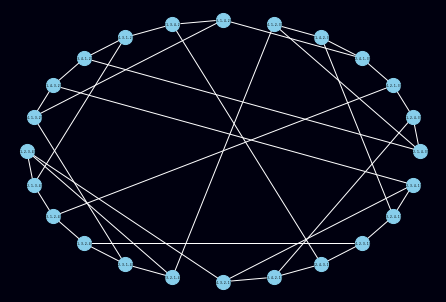

In [13]:
# libraries
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from collections import defaultdict 
from IPython.display import Image, display
G = nx.Graph()
def fnodes():
  queue = []
  l = [[1,2,3,4],[4,3,2,1],[2,1,4,3],[3,1,4,2]]
  j=0
  for j in range(4):
    node = l[j]
    for i in range(6):
      queue.append(node)
      i = i%2
      G.add_node(str(node))
      node1 = list(node)
      node = node[i+1::-1] + node[i+2:]
      G.add_edge(str(node),str(node1))
      #G.add_edge(str(node),str(node[::-1]))
      # print(queue)
    j+=1
  while queue != []:
    i=0
    if queue[i][::-1] in queue:
      queue.remove(queue[i][::-1])
      G.add_edge(str(queue[i]),str(queue[i][::-1]))
      queue.remove(queue[i])

fnodes()
fig = plt.figure()
nx.draw_shell(G, with_labels=True, node_color='skyblue', node_size=200, edge_color='white',font_size=3)
fig.set_facecolor("#00000F")



# **Part 2 Pn **

In [23]:
def val(perm,m):  
        if perm == sorted(perm):
          flag = True
        graph = defaultdict()
        visited = defaultdict()
        queue = [] 
        queue.append([perm,0]) 
        visited[lstr(perm)] = True
  
        while queue:
            a = queue.pop(0); s = a[0]; s1 = a[1] 
            graph[lstr(s)]=[]
            if(s != sorted(s)) and (s1 < m):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                  if(d == sorted(d)):
                    return True
                  graph[lstr(s)].append(lstr(d))
                  queue.append([d,s1+1]) 
                  visited[lstr(d)] = True 
        flag = False

def Pancake_n(n):
  if n == 1:
    return 0
  sup = 1; permutacion = list(range(1,n+1))
  permutaciones = list(itertools.permutations(permutacion))
  for i in range(0,math.factorial(n)):
    for j in range(sup, 2*n):
      perm = list(permutaciones[i])
      if val(perm, j):
        sup = j; break
  return sup
number_p = 7 
for i in range(number_p):
  print("Para", i+1, "panqueques, su número es ",Pancake_n(i+1))


# en 8 no alcanzó en 7 horas así que lo dejé en Pn 7

Para 1 panqueques, su número es  0
Para 2 panqueques, su número es  1
Para 3 panqueques, su número es  3
Para 4 panqueques, su número es  4
Para 5 panqueques, su número es  5
Para 6 panqueques, su número es  7
Para 7 panqueques, su número es  8


# **Using two spatulas**

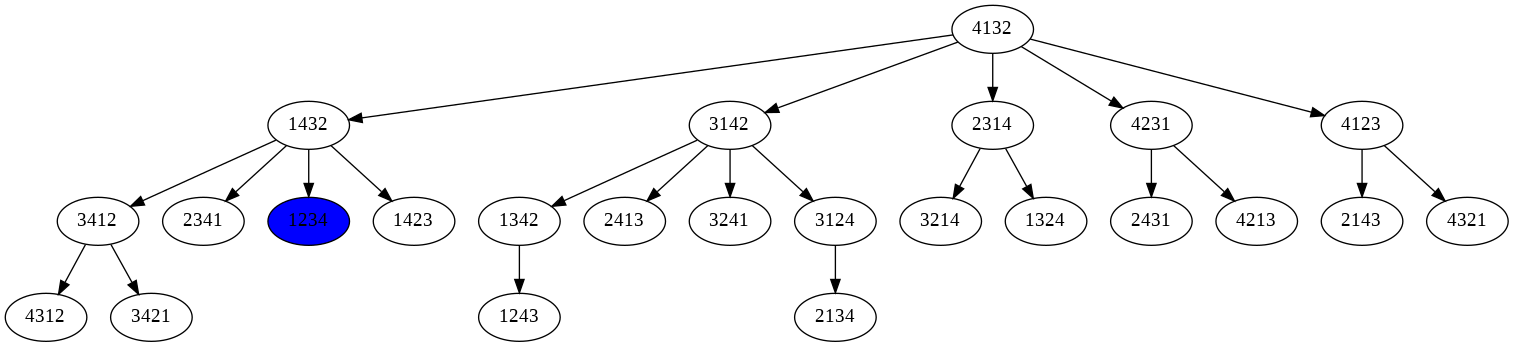

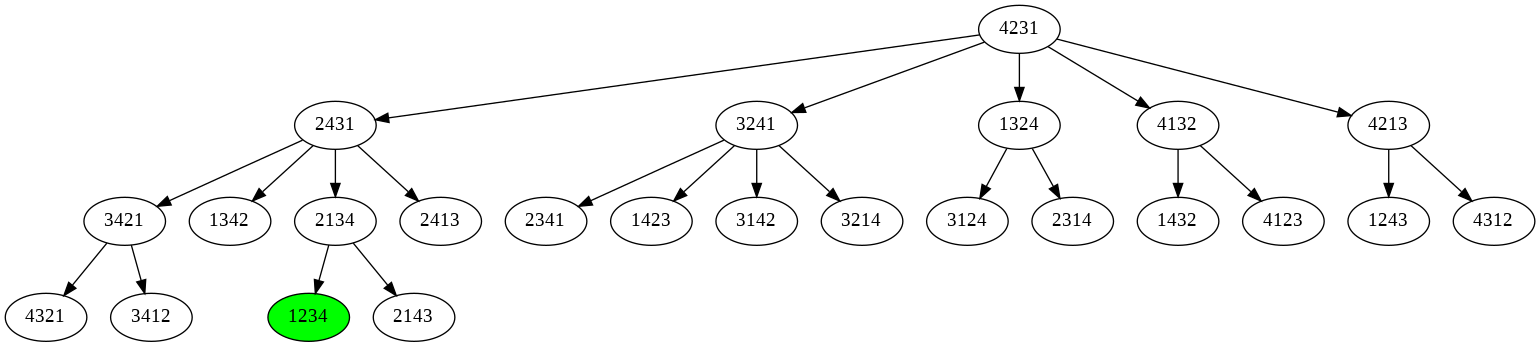

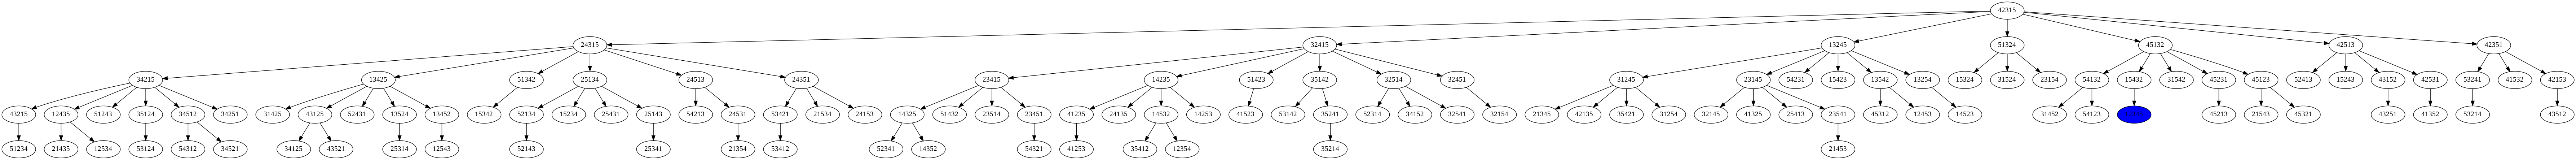

In [63]:
def ModifiedBFS2(s): 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            node = pydot.Node(lstr(s))
            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
              for i in range(len(s)-1):                
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if (d != sorted(d)):
                    node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append(d) 
                  visited[lstr(d)] = True
              # two spatulas
              for i in range(len(s)-1):                
                d = s[:i+1]+s[:i:-1] 
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if (d != sorted(d)):
                    node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="blue") # first sorted green
                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append(d) 
                  visited[lstr(d)] = True 
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

ModifiedBFS2([4,1,3,2])
ModifiedBFS2([4,2,3,1])
ModifiedBFS2([4,2,3,1,5])
